In [1]:
# notebooks/eda.ipynb

import pandas as pd

# Load the news dataset
df_news = pd.read_csv('../data/raw_analyst_ratings.csv')

# Drop Unnamed: 0 column
df_news = df_news.drop(columns=['Unnamed: 0'])

# Inspect the dataset
print("Dataset Info:")
print(df_news.info())
print("\nMissing Values:")
print(df_news.isnull().sum())
print("\nFirst 5 Rows:")
print(df_news.head())


# Parse date column and convert to UTC (if not already)


df_news['date'] = pd.to_datetime(df_news['date'], utc=True, format="mixed")


# Check date conversion
print("\nDate Column (First 5):")
print(df_news['date'].head())

# Verify unique tickers
print("\nUnique Stock Tickers:")
print(df_news['stock'].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB
None

Missing Values:
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

First 5 Rows:
                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https:


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Top 5 Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


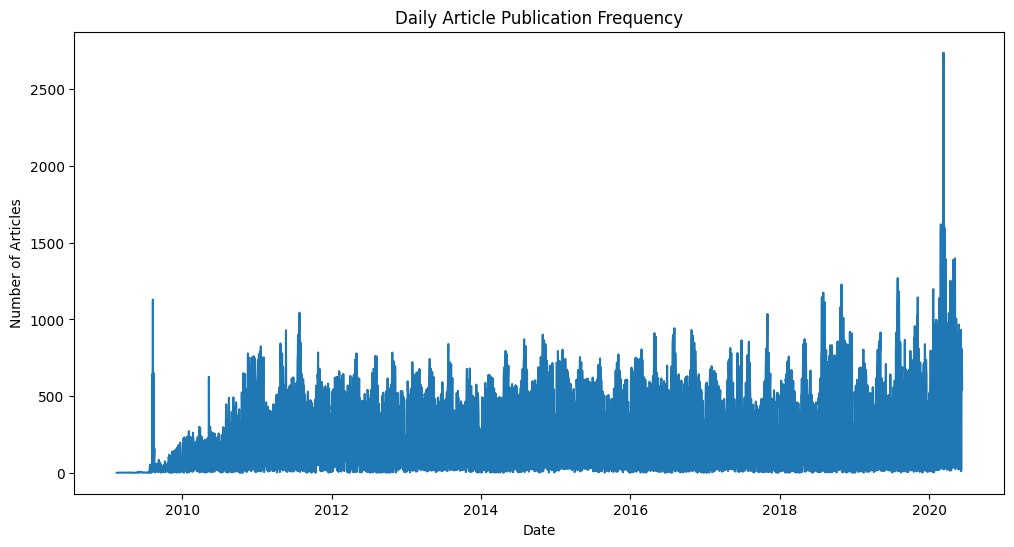

In [2]:
# Descriptive Statistics

# Headline length
df_news['headline_length'] = df_news['headline'].apply(len)
print("\nHeadline Length Statistics:")
print(df_news['headline_length'].describe())

# Articles per publisher
publisher_counts = df_news['publisher'].value_counts()
print("\nTop 5 Publishers by Article Count:")
print(publisher_counts.head())

# Publication date trends
df_news['date_only'] = df_news['date'].dt.date
daily_counts = df_news['date_only'].value_counts().sort_index()

# Plot daily publication frequency
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title('Daily Article Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

[nltk_data] Downloading package punkt to /home/smuca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/smuca/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/smuca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 5 Common Words in Headlines:
[('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('shares', 114140)]


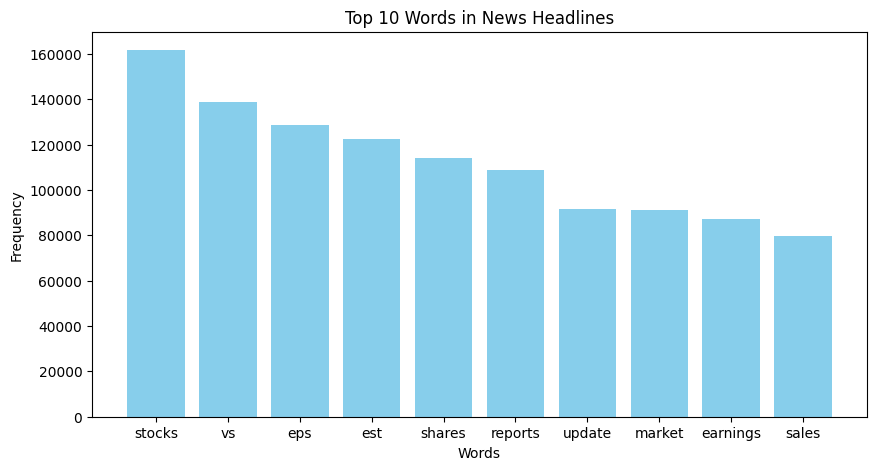

In [3]:
# Text Analysis
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter



# Ensure both punkt and punkt_tab are downloaded
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Explicitly add your nltk_data directory if you use a custom path
# nltk.data.path.append('./nltk_data')  # Uncomment if using local nltk_data folder


# Preprocess text
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

df_news['tokens'] = df_news['headline'].apply(preprocess_text)
all_tokens = [token for tokens in df_news['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
print("\nTop 5 Common Words in Headlines:")
print(word_freq.most_common(5))

# Visualize top words
top_words = dict(word_freq.most_common(10))
plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values(), color='skyblue')
plt.title('Top 10 Words in News Headlines')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Hourly Article Counts:
hour
0     1351472
1          82
2          48
3          27
4          67
5          14
6          57
7          93
8        1469
9        1829
10       2476
11       5033
12       5527
13       5965
14       7669
15       5701
16       5732
17       2710
18       2075
19       1612
20       3939
21       2800
22        704
23        227
Name: count, dtype: int64


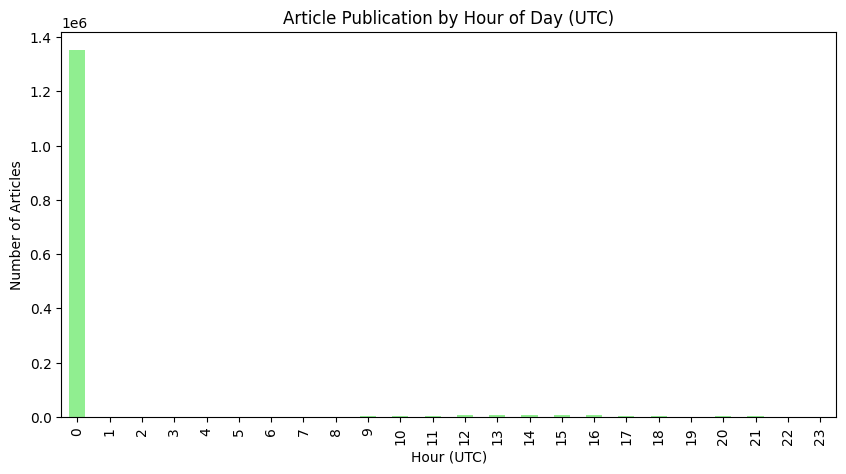

In [4]:
# Time Series Analysis (Hourly)
import matplotlib.pyplot as plt

# Extract hour from UTC datetime
df_news['hour'] = df_news['date'].dt.hour
hourly_counts = df_news['hour'].value_counts().sort_index()

# Print hourly counts
print("\nHourly Article Counts:")
print(hourly_counts)

# Plot hourly publication frequency
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='lightgreen')
plt.title('Article Publication by Hour of Day (UTC)')
plt.xlabel('Hour (UTC)')
plt.ylabel('Number of Articles')
plt.show()


Top 5 Publisher Domains:
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


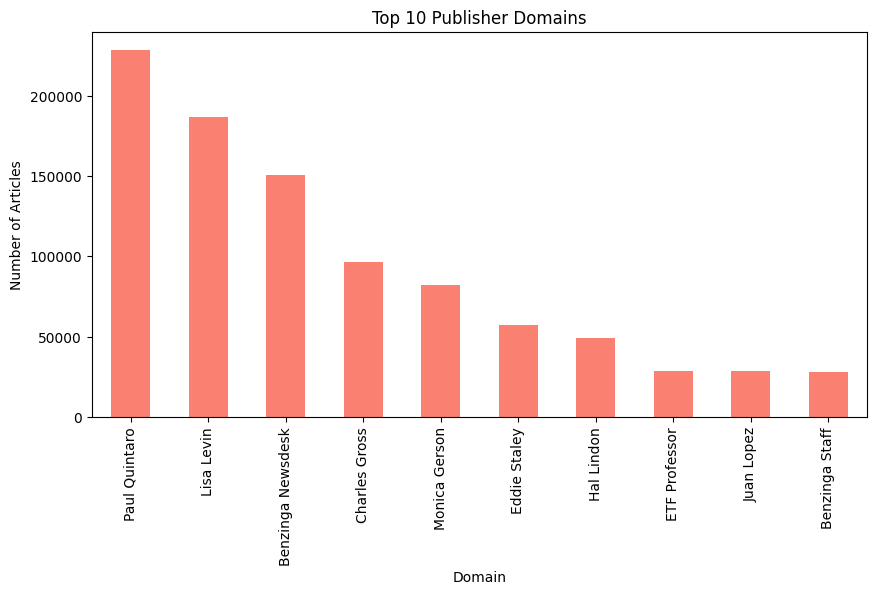

In [5]:
# Publisher Analysis
def extract_domain(publisher):
    if '@' in publisher:
        return publisher.split('@')[1]
    return publisher

df_news['publisher_domain'] = df_news['publisher'].apply(extract_domain)
domain_counts = df_news['publisher_domain'].value_counts()
print("\nTop 5 Publisher Domains:")
print(domain_counts.head())

# Visualize top domains
plt.figure(figsize=(10, 5))
domain_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Publisher Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.show()

In [6]:
# Filter for relevant tickers
tickers = ['AAPL', 'AMZN', 'GOOG', 'FB', 'MSF', 'NVDA', 'TSLA']
df_news_filtered = df_news[df_news['stock'].isin(tickers)]

# Inspect filtered dataset
print("\nFiltered Dataset Info:")
print(df_news_filtered.info())
print("\nArticles per Ticker:")
print(df_news_filtered['stock'].value_counts())


Filtered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 7331 entries, 6680 to 1257095
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   headline          7331 non-null   object             
 1   url               7331 non-null   object             
 2   publisher         7331 non-null   object             
 3   date              7331 non-null   datetime64[ns, UTC]
 4   stock             7331 non-null   object             
 5   headline_length   7331 non-null   int64              
 6   date_only         7331 non-null   object             
 7   tokens            7331 non-null   object             
 8   hour              7331 non-null   int32              
 9   publisher_domain  7331 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(1), object(7)
memory usage: 601.4+ KB
None

Articles per Ticker:
stock
NVDA    3146
TSLA    1875
GOOG    1199
AA

In [43]:
midnight_articles = df_news[df_news['date'].dt.hour == 0]
print(f"Articles at midnight: {len(midnight_articles):,}")


Articles at midnight: 1,351,472


Text(0, 0.5, 'Number of Articles')

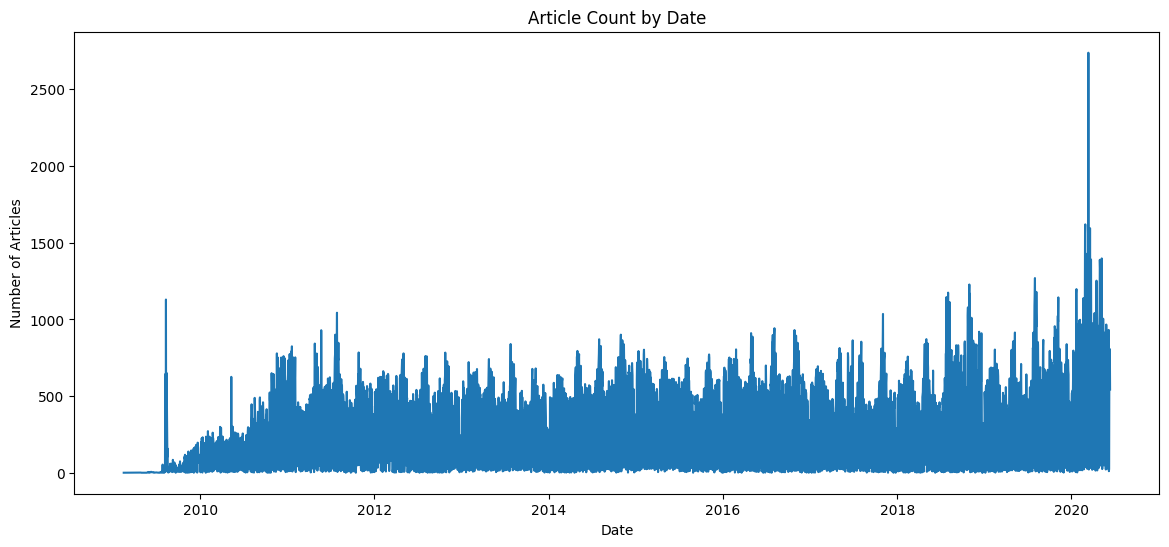

In [10]:
daily_counts = df_news['date_only'].value_counts().sort_index()
daily_counts.plot(figsize=(14, 6))
plt.title('Article Count by Date')
plt.xlabel('Date')
plt.ylabel('Number of Articles')